In [19]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:

# Step 2: Load the data
df = pd.read_csv("C:/Users/akhil/Downloads/behavioural_dataset.csv")

In [4]:
# Step 3: Create affordability column
df["Can Afford EV"] = df["Total Salary"] >= (1.5 * df["Price"])
df["Can Afford EV"] = df["Can Afford EV"].map({True: "Yes", False: "No"})


Text(0.5, 1.0, 'Target Variable Distribution')

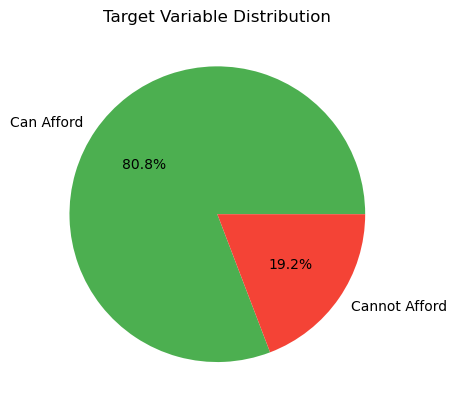

In [25]:
plt.pie(df["Can Afford EV"].value_counts(), 
        labels=["Can Afford", "Cannot Afford"], 
        autopct="%1.1f%%", 
        colors=["#4CAF50", "#F44336"])
plt.title("Target Variable Distribution")

In [5]:
# Step 4: Preprocess categorical variables
label_cols = ["Profession", "Marrital Status", "Education", "Personal loan"]
encoders = {}
for col in label_cols:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col])
    encoders[col] = enc


In [6]:
# Step 5: Define features and target
X = df[["Age", "Profession", "Marrital Status", "Education", 
        "No of Dependents", "Personal loan", "Total Salary"]]
y = df["Can Afford EV"]

In [7]:
# Step 6: Encode target variable
y = LabelEncoder().fit_transform(y)  # Yes = 1, No = 0

In [8]:
# Step 7: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 8: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Step 9: Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.88      0.94      0.91        16

    accuracy                           0.85        20
   macro avg       0.77      0.72      0.74        20
weighted avg       0.84      0.85      0.84        20



In [11]:
# Step 10: Predict for different age groups
import numpy as np

# Example: Predict for synthetic data by age group
sample = pd.DataFrame({
    "Age": [25, 35, 45, 55],
    "Profession": [encoders["Profession"].transform(["Salaried"])[0]] * 4,
    "Marrital Status": [encoders["Marrital Status"].transform(["Married"])[0]] * 4,
    "Education": [encoders["Education"].transform(["Post Graduate"])[0]] * 4,
    "No of Dependents": [1, 2, 3, 2],
    "Personal loan": [encoders["Personal loan"].transform(["Yes"])[0]] * 4,
    "Total Salary": [1000000, 2000000, 3000000, 4000000]
})

sample_pred = model.predict(sample)
for age, pred in zip(sample["Age"], sample_pred):
    print(f"Age {age}: {'Can Afford EV' if pred == 1 else 'Cannot Afford EV'}")


Age 25: Cannot Afford EV
Age 35: Can Afford EV
Age 45: Can Afford EV
Age 55: Can Afford EV


In [ ]:
# Report on Electric Vehicle Affordability Prediction by Age Group

print("Electric Vehicle Affordability Prediction Report\n")
print("1. Data Overview:")
print(f"- Total records: {df.shape[0]}")
print(f"- Features used: {list(X.columns)}")
print(f"- Target variable: 'Can Afford EV' (encoded as 1=Yes, 0=No)\n")

print("2. Model Summary:")
print("- Model used: RandomForestClassifier")
print("- Training set size:", X_train.shape[0])
print("- Test set size:", X_test.shape[0])
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))

print("3. Feature Importances:")
for name, importance in zip(X.columns, feature_importances):
    print(f"  {name}: {importance:.3f}")

print("\n4. Affordability by Age Group (Test Set):")
print(grouped)

print("\n5. Example Predictions for Synthetic Age Groups:")
for age, pred in zip(sample["Age"], sample_pred):
    print(f"  Age {age}: {'Can Afford EV' if pred == 1 else 'Cannot Afford EV'}")

Electric Vehicle Affordability Prediction Report

1. Data Overview:
- Total records: 99
- Features used: ['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents', 'Personal loan', 'Total Salary']
- Target variable: 'Can Afford EV' (encoded as 1=Yes, 0=No)

2. Model Summary:
- Model used: RandomForestClassifier
- Training set size: 79
- Test set size: 20

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.88      0.94      0.91        16

    accuracy                           0.85        20
   macro avg       0.77      0.72      0.74        20
weighted avg       0.84      0.85      0.84        20

3. Feature Importances:
  Age: 0.305
  Profession: 0.041
  Marrital Status: 0.069
  Education: 0.072
  No of Dependents: 0.169
  Personal loan: 0.041
  Total Salary: 0.303

4. Affordability by Age Group (Test Set):
Age Group
21-30      0.0
31-40    100.0
41-50    

Text(0, 0.5, 'Total Salary')

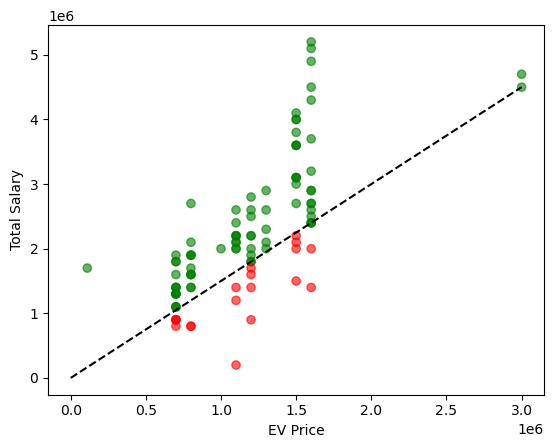

In [17]:
plt.scatter(df["Price"], df["Total Salary"], 
           c=df["Can Afford EV"].map({"Yes": "green", "No": "red"}), 
           alpha=0.6)
plt.plot([0, max(df["Price"])], [0, 1.5 * max(df["Price"])], "k--")  # Threshold line
plt.xlabel("EV Price")
plt.ylabel("Total Salary")

C:\Users\akhil\AppData\Local\Temp\ipykernel_11352\861074719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="rocket")


Text(0.5, 1.0, 'Feature Importances for Affordability Prediction')

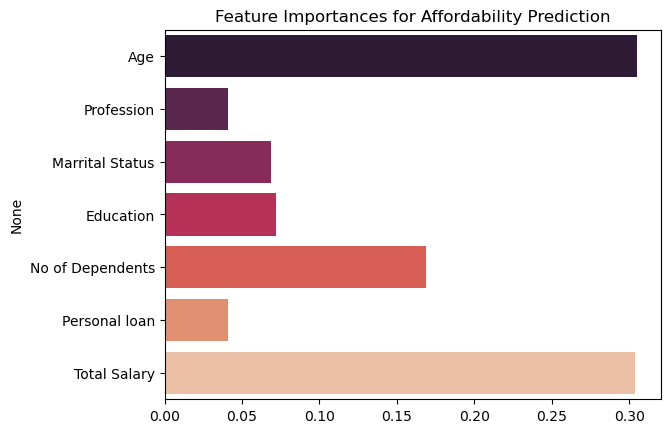

In [20]:
importances = model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features, palette="rocket")
plt.title("Feature Importances for Affordability Prediction")

C:\Users\akhil\AppData\Local\Temp\ipykernel_11352\328647303.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Can Afford EV", y="Age", data=df, palette="viridis")


Text(0.5, 1.0, 'Age Distribution by Affordability Status')

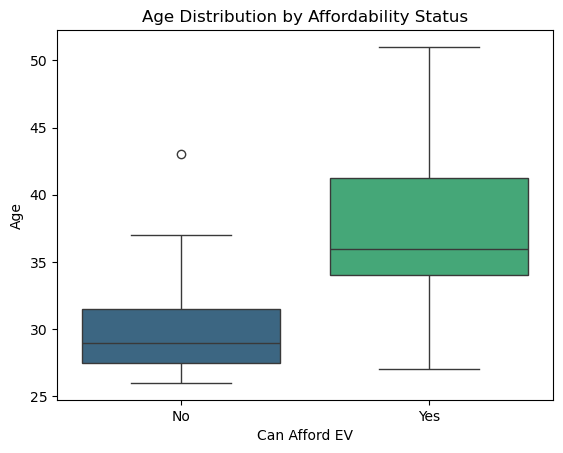

In [22]:
sns.boxplot(x="Can Afford EV", y="Age", data=df, palette="viridis")
plt.title("Age Distribution by Affordability Status")

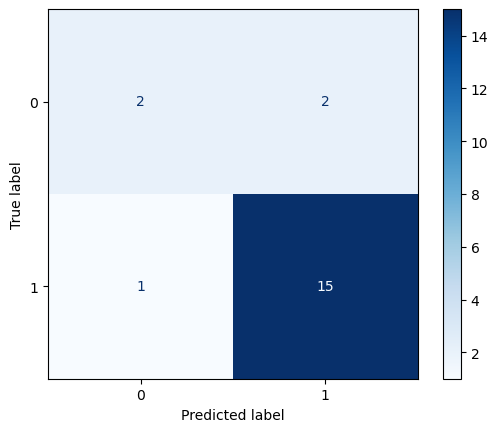

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")

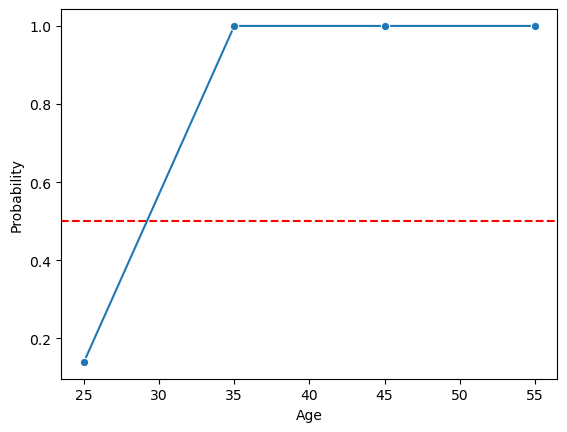

In [24]:
sample["Probability"] = model.predict_proba(sample)[:, 1]  # P(Can Afford)
sns.lineplot(data=sample, x="Age", y="Probability", marker="o")
plt.axhline(0.5, color="red", linestyle="--")  # Decision boundary